In [479]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn')

In [271]:
nithya = pd.read_csv('data/nithyas_tweets.csv')

In [272]:
nithya.head()

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets
0,Nithya Raman,@nithyavraman,2020-11-04T01:22:32.000Z,This campaign was never about any one person. ...,NaN,57.0,261,2K
1,Nithya Raman,@nithyavraman,2020-11-17T22:32:56.000Z,Very excited to be joining \n@PplsAction\n and...,NaN,3.0,26,190
2,Nithya Raman,@nithyavraman,2020-11-07T01:58:36.000Z,"To the residents of CD4, our brilliant, kind, ...",NaN,184.0,1.5K,13K
3,Nithya Raman,@nithyavraman,2020-11-07T02:01:25.000Z,Replying to \n@nithyavramanTo the people of Co...,NaN,5.0,15,779
4,Nithya Raman,@nithyavraman,2020-11-07T02:02:06.000Z,I have countless people to thank individually....,NaN,25.0,25,961


In [273]:
nithya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserName   543 non-null    object 
 1   Handle     543 non-null    object 
 2   Timestamp  543 non-null    object 
 3   Text       543 non-null    object 
 4   Emojis     20 non-null     object 
 5   Comments   498 non-null    float64
 6   Likes      540 non-null    object 
 7   Retweets   543 non-null    object 
dtypes: float64(1), object(7)
memory usage: 34.1+ KB


In [274]:
nithya.loc[nithya.Likes.isin(['1.5K', '1.3K', '1.1K', '1K', '2.2K', '1.6K', '5.7K', '1.2K', '3K']) , ['Retweets']] = [13000, 5700, 4100, 3700, 5000, 3700, 2700, 10000, 10900, 22100, 3900]

nithya.loc[nithya.Likes.isin(['1.5K', '1.3K', '1.1K', '1K', '2.2K', '1.6K', '5.7K', '1.2K', '3K']) , ['Likes']] = [1500, 1300, 1100, 1000, 2200, 1600, 1500, 5700, 1200, 3000, 1300]


In [275]:
nithya.loc[nithya.Retweets.isin(['1K']) , ['Retweets']] = [1000, 1000, 1000, 1000, 1000, 1000]

In [276]:
nithya.loc[nithya.Retweets.isin(['1K', '2K', '1.1K', '1.2K', '3.4K', '2.9K', '2.5K',
                                 '6.2K', '1.8K', '1.9K', '1.4K', '1.3K', '2.4K', '3.1K', 
                                 '1.6K', '1.5K', '3.5K', '3.8K', '2.3K', '3.3K']) , ['Retweets']] = [2000, 1100, 1200, 3400, 2900, 2500, 6200, 1200, 1800, 1900, 1400, 1300, 
                                                                                                    2400, 3100, 1300, 2500, 1200, 1800, 1600, 1100, 1300, 
                                                                                                      1500, 3500, 1200, 3800, 1200, 2400, 2300, 3300]

In [277]:
nithya[nithya.Handle!='@nithyavraman'] 

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets
166,Rekha Shankar,@rekhalshankar,2020-08-21T03:19:29.000Z,we are SO CLOSE to our goal of 3k. can YOU hel...,NaN,NaN,4,9
209,Ground Game LA,@GroundGameLA,2020-08-05T01:58:56.000Z,"Ground Game is LIVE with \n@nithyavraman\n, \n...",🥾 👞 👢 👞 👢,1.0,11,15
210,Ground Game LA,@GroundGameLA,2020-08-05T00:22:50.000Z,Join us tonight at 7pm!\nWe’re hosting a round...,🥾,1.0,22,32
286,The Forge: Organizing Strategy and Practice,@ForgeOrganizing,2020-07-01T16:51:23.000Z,We talked to L.A. City Council candidate \n@ni...,NaN,1.0,25,71
299,Libby Denkmann,@libdenk,2020-06-16T17:26:08.000Z,"Wesson & \n@CD6Nury\n plan to intro ""a systema...",NaN,2.0,32,74
320,CHIRLA,@CHIRLA,2020-06-04T22:00:47.000Z,The \n@MayorOfLA\n announced a $100-$150M cut ...,NaN,1.0,22,81
328,fund the us postal service - defund the police,@OsopePatrisse,2020-05-26T22:05:06.000Z,Do you know what it feels like to be hunted? T...,NaN,14.0,362,915
436,ACT-LA,@All4Transit,2020-03-16T18:10:00.000Z,ACTION ALERT: LA City Council will be voting t...,NaN,10.0,330,493


In [278]:
nithya.Emojis.fillna('', inplace=True)

In [279]:
nithya['Comments'].fillna(0, inplace=True)
nithya['Likes'].fillna(0, inplace=True)

In [280]:
nithya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserName   543 non-null    object 
 1   Handle     543 non-null    object 
 2   Timestamp  543 non-null    object 
 3   Text       543 non-null    object 
 4   Emojis     543 non-null    object 
 5   Comments   543 non-null    float64
 6   Likes      543 non-null    object 
 7   Retweets   543 non-null    object 
dtypes: float64(1), object(7)
memory usage: 34.1+ KB


In [281]:
nithya = nithya.astype({'Timestamp': 'datetime64', 'Likes': 'int32', 'Retweets': 'int32'})

In [282]:
nithya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   543 non-null    object        
 1   Handle     543 non-null    object        
 2   Timestamp  543 non-null    datetime64[ns]
 3   Text       543 non-null    object        
 4   Emojis     543 non-null    object        
 5   Comments   543 non-null    float64       
 6   Likes      543 non-null    int32         
 7   Retweets   543 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 29.8+ KB


In [283]:
david = pd.read_csv('data/davids_tweets.csv')

In [284]:
david.Comments.loc[david.Comments.isin(['28K' , '70.7K','12.6K', '2.2K', '6.2K','43.6K','3.9K','1.6K'])] = [2800, 70700, 12600, 2200, 6200, 43600, 3900, 1600]

In [285]:
david.Likes.loc[david.Likes.isin(['29.5K', '7.7K', '1.3K', '2.4K', '128.5K','24.2K',
       '46.3K', '22.2K', '44.4K', '47.2K', '3.3K', '2K','16.6K'])] = [29500, 7700, 1300, 2400, 128500, 24200, 46300, 22200, 44400, 47200, 3300, 2000, 16600]

In [286]:
david.Retweets.loc[david.Retweets.isin(['52.6K','5.2K','1.2K', '6K', '17.9K', '656.2K','113.4K', '217.3K',
       '150.4K', '3K', '2.2K', '219K', '12.4K',
       '1.3K','6.3K','26.9K'])] = [52600, 5200, 1200, 6000, 17900, 656200, 113400, 217300, 150400, 3000, 2200, 219000, 12400, 1300, 6300, 26900]

In [287]:
david.Retweets.loc[david.Retweets.isin(['58.1K'])] = [58100]

In [288]:
david.Retweets.loc[david.Retweets.isin(['2.9K'])] = [2900, 2900]

In [289]:
david['Comments'].fillna(0, inplace=True)
david['Likes'].fillna(0, inplace=True)
david['Retweets'].fillna(0, inplace=True)
david.Emojis.fillna('', inplace=True)
david.Text.fillna('', inplace=True)

In [290]:
david = david.astype({'Timestamp': 'datetime64', 'Likes': 'int32', 'Retweets': 'int32', 'Comments': 'float64'})

In [291]:
david.head()

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets
0,David E. Ryu,@davideryu,2020-06-25 00:35:29,All together now: WEAR A MASK.LosFelizLedger\n...,,41.0,25,78
1,Gavin Newsom,@GavinNewsom,2020-11-19 22:17:04,"Due to the rise in #COVID19 cases, CA is issui...",,2800.0,29500,52600
2,Los Angeles County,@CountyofLA,2020-11-02 23:36:08,Voting in person? Protect yourself and others ...,,16.0,81,177
3,Listos California,@ListosCA,2020-10-29 18:45:36,"Wash your hands, California! \nAs we work tog...",,5.0,15,18
4,David E. Ryu,@davideryu,2020-10-30 17:10:35,"""It's not just about us - it's about standing ...",,4.0,7,8


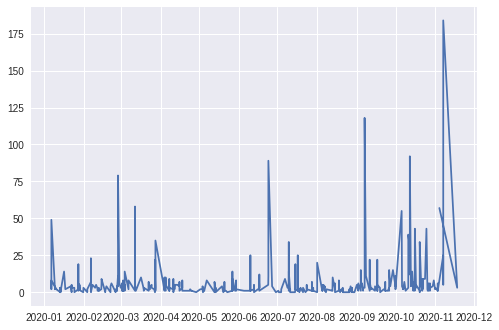

In [292]:
plt.plot(nithya.Timestamp, nithya.Comments)
plt.show;

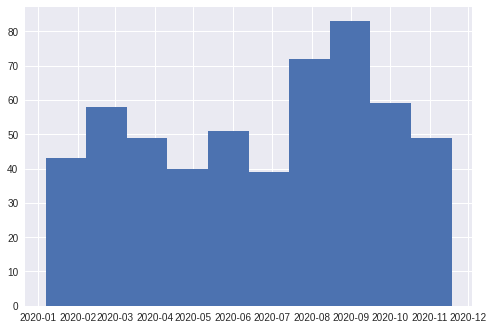

In [293]:
plt.hist(nithya.Timestamp)
plt.show;

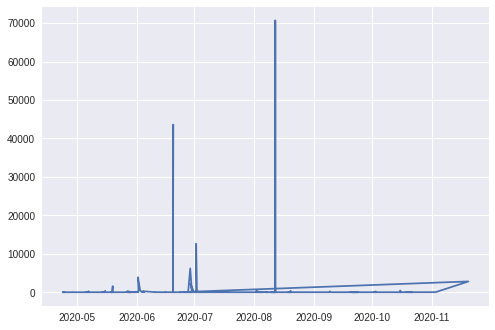

In [294]:
plt.plot(david.Timestamp, david.Comments)
plt.show;

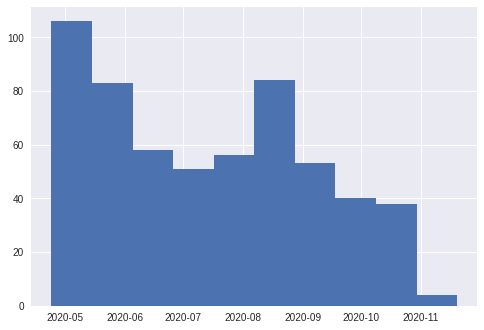

In [295]:
plt.hist(david.Timestamp)
plt.show;

In [296]:
nithya_tr = pd.read_csv('data/nithya_tweets_replies.csv')

In [297]:
nithya_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   UserName   1677 non-null   object
 1   Handle     1674 non-null   object
 2   Timestamp  1677 non-null   object
 3   Text       1671 non-null   object
 4   Emojis     111 non-null    object
 5   Comments   1148 non-null   object
 6   Likes      1268 non-null   object
 7   Retweets   1449 non-null   object
dtypes: object(8)
memory usage: 104.9+ KB


In [298]:
nithya_tr.Comments.loc[nithya_tr.Comments.isin(['2.1K','1.4K', '1.1K', '1.7K', '22.3K'])] = [2100, 1400, 1100, 1400, 1100, 1700, 22300]

In [299]:
nithya_tr.Comments.loc[nithya_tr.Comments.isin(['1.3K'])] = [1300, 1300]

In [300]:
nithya_tr.Comments.loc[nithya_tr.Comments.isin(['1K'])]  = [1000]

In [301]:
nithya_tr.Likes.loc[nithya_tr.Likes.isin(['1.5K', '1.3K', '1.1K', '1K', '2.2K', '1.6K', 
                                          '11.5K', '1.2K',  '1.4K','2.5K', '13.3K', '75.1K', '5.6K',
                                          '2.6K', '16.3K', '308', '355', '532','2.8K', '2.9K', '2K', '1.9K'
                                          ])] = [1500, 1300, 1100, 1000, 2200, 1600, 1500, 1000, 11500, 1200, 1300
                                                , 1500, 1400, 2500, 2500, 2500, 1600, 13300, 75100, 1000, 5600, 2600, 
                                                 16300, 308, 355, 532, 2800, 2900, 2000, 2900, 1900, 2200, 1500,
                                                2500, 2900, 2600, 1300, 1000, 1600, 1900]

In [302]:
nithya_tr.Likes.loc[nithya_tr.Likes.isin(['1.5K', '1.3K', '1.1K', '1K', '2.2K', '1.6K', 
                                          '11.5K', '1.2K',  '1.4K','2.5K', '13.3K', '75.1K', '5.6K',
                                          '2.6K', '16.3K', '308', '355', '532','2.8K', '2.9K', '2K', '1.9K''3.5K', '7.1K', '7K', '5.5K', '3K', '4.3K', '39.3K','51.8K', '35.9K',
                                          '1.7K', '6.9K', '6.5K', '406', '224', '10.8K','6K', '30.4K', '74.9K', 
                                          '4.5K', '31.6K', '8.7K', '5K', '6.6K', '7.9K', '122.2K', '2.3K',
                                          '4.8K', '2.7K', '6.3K', '9.3K', '55.7K','11.6K'])] = [7100, 7000, 5500,
                                                                                               3000, 4300, 39300,
                                                                                               51800, 35900, 1700,
                                                                                               6900, 6500, 406, 224, 10800, 6000, 30400, 74900, 4500, 31600, 8700, 6500, 
                                                                                                5000, 6600, 7900, 122200, 2300, 4800, 2700, 6300, 9300, 55700, 11600, 3000, 
                                                                                                6000, 7100, 4300]

In [303]:
nithya_tr.Likes.loc[nithya_tr.Likes.isin(['23K'])] = [23000]

In [304]:
nithya_tr.Likes.loc[nithya_tr.Likes.isin(['3.5K'])] = [3500, 3500]

In [305]:
nithya_tr.Retweets.loc[nithya_tr.Retweets.isin(['2K', '13K', 
     '1.1K',
       '1.2K', 
       '3.4K',  '2.9K', 
       '2.5K', '5.7K', 
       '1K', '4.1K', '6.2K', '3.7K', 
        '1.8K', 
       '1.9K',  '1.4K',
       ])] = [2000, 13000, 1100, 1200, 3400, 2900, 2500, 5700, 1000, 4100, 6200, 3700, 1200, 1800
             , 1900, 1400, 1000, 1000, 3700, 1200, 1200, 1800, 1000, 1100, 1000, 1000, 1200, 1800, 
             1000, 1000, 1200, 1000, 5700, 1000, 1000, 1400, 1000, 1400, 1400, 1200, 1400, 2500,
             1000, 2500, 1900, 1000, 1000, 1200, 1800, 1100, 1100]
      

In [306]:
nithya_tr.Retweets.loc[nithya_tr.Retweets.isin([ '5K', '1.3K',  '3.1K', '2.7K',  '3.9K', '2.8K', '1.6K', '1.5K',  '3.5K',  '3.8K', '10.9K',
'3.3K',  '2.3K', '2.6K', '7.7K', '5.8K', '52.4K', '4.2K', '4.7K', '51.5K', '149.1K', '26.7K', '11.3K','3.2K', '14.8K',

])] = [5000, 1300, 3100, 1300, 2700, 3900, 2800, 1600, 1300, 1500, 3500, 3800, 10900, 3900, 3300, 2300, 1300
      , 2600, 1500, 7700, 5800, 5800, 52400, 4200, 1500, 4700, 51500, 1300, 149100, 2600, 26700, 11300, 3800, 3200,
      14800, 5000, 3200, 1300, 2300, 1500, 2700, 1500, 1600, 1300, 1500, 1500, 3500, 7700, 2700]

In [307]:
nithya_tr.Retweets.loc[nithya_tr.Retweets.isin([ '1.7K', '8.1K',  '4.5K', '9.6K', '21.6K',  '2.1K', '15.8K','5.3K', '5.5K','13.5K', '32.3K', 
                                                '4.6K', '3K',  '9.8K', '9K', '82K', '116.5K', '2.2K', '99.8K', '6.8K', 
                                                '4.4K', '7.6K', '23.2K', '24.9K','10K', '8.7K', '43.6K', '105.3K', '4.9K', '69.7K', '34.9K', 
                                                '18.8K', '7.5K', '27.6K','9.3K', '209.6K','8.8K', '4.8K', '8.9K', '12.7K','54.1K', '26.4K','17.3K'])] = [1700, 8100, 4500, 9600, 21600, 1700, 
                                                                                                          2100, 1700, 15800, 5300, 5500, 13500, 32300, 4600, 3000, 9800, 9000, 82000, 116500, 
                                                                                                          1700, 2200, 99800, 2200, 6800, 4400, 7600, 23200, 24900, 10000, 8700, 43600, 105300,
                                                                                                          4900, 69700, 34900, 18800, 7500,9300, 27600, 209600, 8800, 4800, 8900, 12700, 
                                                                                                          54100, 26400, 17300]

In [308]:
nithya_tr['Comments'].fillna(0, inplace=True)
nithya_tr['Likes'].fillna(0, inplace=True)
nithya_tr['Retweets'].fillna(0, inplace=True)
nithya_tr.Emojis.fillna('', inplace=True)
nithya_tr.Text.fillna('', inplace=True)

In [309]:
nithya_tr = nithya_tr.astype({'Timestamp': 'datetime64', 'Likes': 'int32', 'Retweets': 'int32', 'Comments': 'float64'})

In [310]:
nithya_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   1677 non-null   object        
 1   Handle     1674 non-null   object        
 2   Timestamp  1677 non-null   datetime64[ns]
 3   Text       1677 non-null   object        
 4   Emojis     1677 non-null   object        
 5   Comments   1677 non-null   float64       
 6   Likes      1677 non-null   int32         
 7   Retweets   1677 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 91.8+ KB


In [311]:
david_tr = pd.read_csv('data/david_tweets_replies.csv')

In [312]:
david_tr.Comments.loc[david_tr.Comments.isin(['28.2K', '12.6K', '6.2K',
       '43.8K', '3.9K', '1.1K', '1K',  '3.8K', '3.3K', '19.9K'])] = [28200, 12600, 6200, 43800, 3900, 1100, 1000, 3800, 3300, 19900]

In [313]:
david_tr.Likes.loc[david_tr.Likes.isin(['29.6K','7.7K', '4.8K','1.3K',
       '1K', '24.2K', 
       '22.2K', '44.4K',  '47.2K', '3.3K','1.2K', '2K',  '3.1K',
       '1.6K', '21K', '2.5K',  '5.1K', '11.5K',
       '5.3K', '4.3K', '12.6K',
       '80.8K', '1.1K', '130.6K'])] = [29600, 7700, 4800, 1300, 1000, 24200, 22200, 44400, 47200, 3300, 1200, 2000, 3100, 1600, 21000, 2500, 5100, 11500, 5300, 4300, 12600, 80800, 1100, 130600, 2000]

In [314]:
david_tr.Retweets.loc[david_tr.Retweets.isin(['52.7K', '5.2K', '1.2K',
       '26K', '6K', '1.1K', '113.4K', '58.1K', '2.9K', '150.5K', '219K', 
        '12.4K', '1.3K', '6.3K', '1.8K', '11K', 
       '10.2K', '103.1K', '4.6K','1.5K',  '2K', '2.1K',
       '3.1K',  '25.3K',  '36.4K',
        '1K', '6.8K', '46.9K', '261.1K', '15.4K', '2.3K', '2.5K',
       '572.5K',  '4.2K'])]  = [52700, 5200, 1200, 26000, 6000, 1100, 1100, 113400, 58100, 2900, 150500,
                              219000, 12400, 1300, 6300, 1800, 2900, 11000, 10200, 103100, 4600, 1500,
                              1100, 2000, 2100, 3100, 25300, 36400, 1000, 11000, 6800, 46900, 261100,
                               15400, 2300, 2500, 572500, 4200, 1000]

In [315]:
david_tr.Retweets.loc[david_tr.Retweets.isin(['2.2K'])] = [2200, 2200]

In [316]:
david_tr['Comments'].fillna(0, inplace=True)
david_tr['Likes'].fillna(0, inplace=True)
david_tr['Retweets'].fillna(0, inplace=True)
david_tr.Emojis.fillna('', inplace=True)
david_tr.Text.fillna('', inplace=True)

In [317]:
david_tr = david_tr.astype({'Timestamp': 'datetime64', 'Likes': 'int32', 'Retweets': 'int32', 'Comments': 'float64'})

In [318]:
david_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   2263 non-null   object        
 1   Handle     2263 non-null   object        
 2   Timestamp  2263 non-null   datetime64[ns]
 3   Text       2263 non-null   object        
 4   Emojis     2263 non-null   object        
 5   Comments   2263 non-null   float64       
 6   Likes      2263 non-null   int32         
 7   Retweets   2263 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 123.9+ KB


(array([1., 0., 0., ..., 0., 0., 1.]),
 array([17741.95883102, 17742.33177388, 17742.70471673, ...,
        18585.1826328 , 18585.55557566, 18585.92851852]),
 <BarContainer object of 2263 artists>)

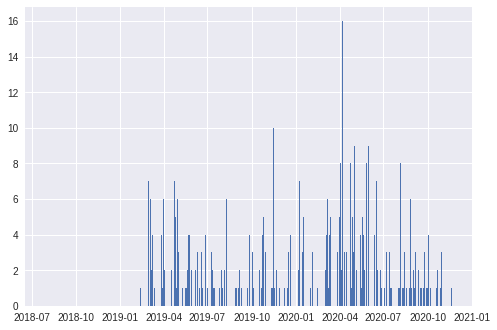

In [319]:
plt.hist(david_tr.Timestamp, david_tr.Timestamp.count())

(array([3., 2., 1., ..., 0., 0., 1.]),
 array([15245.84481481, 15247.83533045, 15249.82584609, ...,
        18579.95850576, 18581.9490214 , 18583.93953704]),
 <BarContainer object of 1677 artists>)

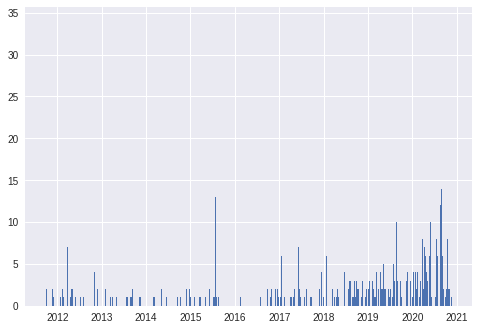

In [320]:
plt.hist(nithya_tr.Timestamp, nithya_tr.Timestamp.count())

In [321]:
nithya_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   1677 non-null   object        
 1   Handle     1674 non-null   object        
 2   Timestamp  1677 non-null   datetime64[ns]
 3   Text       1677 non-null   object        
 4   Emojis     1677 non-null   object        
 5   Comments   1677 non-null   float64       
 6   Likes      1677 non-null   int32         
 7   Retweets   1677 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 91.8+ KB


In [322]:
nithya_tr = nithya_tr.drop([998,1012,1122])

In [324]:
nithya_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 0 to 1676
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   1674 non-null   object        
 1   Handle     1674 non-null   object        
 2   Timestamp  1674 non-null   datetime64[ns]
 3   Text       1674 non-null   object        
 4   Emojis     1674 non-null   object        
 5   Comments   1674 non-null   float64       
 6   Likes      1674 non-null   int32         
 7   Retweets   1674 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 104.6+ KB


In [325]:
david.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   573 non-null    object        
 1   Handle     573 non-null    object        
 2   Timestamp  573 non-null    datetime64[ns]
 3   Text       573 non-null    object        
 4   Emojis     573 non-null    object        
 5   Comments   573 non-null    float64       
 6   Likes      573 non-null    int32         
 7   Retweets   573 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 31.5+ KB


In [326]:
david_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   2263 non-null   object        
 1   Handle     2263 non-null   object        
 2   Timestamp  2263 non-null   datetime64[ns]
 3   Text       2263 non-null   object        
 4   Emojis     2263 non-null   object        
 5   Comments   2263 non-null   float64       
 6   Likes      2263 non-null   int32         
 7   Retweets   2263 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 123.9+ KB


In [327]:
old_nithya = pd.read_csv('data/pre2019_nithya.csv')

In [350]:
old_nithya['Comments'].fillna(0, inplace=True)
old_nithya['Likes'].fillna(0, inplace=True)
old_nithya['Retweets'].fillna(0, inplace=True)
old_nithya.Emojis.fillna('', inplace=True)
old_nithya.Text.fillna('', inplace=True)

In [337]:
old_nithya.Retweets.loc[old_nithya.Retweets.isin(['1K', '13K', '2K', '1.1K','1.2K', 
                                                  '3.4K','2.5K', '5.7K', '4.1K', '6.1K', 
                                                  '1.8K', '1.9K', '2.4K',
       '3.1K', '1.3K', '896', '390', '2.7K', '10K', '1.5K', 
        '3.8K', '2.3K', '22K', '3.3K'])] = [1000, 13000, 2000, 2000, 1100, 1200, 3400, 2500, 5700
                                           , 1000, 4100, 6100, 1200, 1800, 1900, 2400, 3100, 1300, 896, 
                                           2500, 390, 2700, 10000, 1200, 1100, 1000, 1500, 1200, 3800, 
                                            1000, 1200, 2300, 2400, 22000, 33000, 2700, 1800]

In [347]:
old_nithya.Retweets.loc[old_nithya.Retweets.isin(['1.6K'])] = [1600]

/home/mario/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [341]:
old_nithya.Likes.loc[old_nithya.Likes.isin(['1.5K', '1.3K', '1.1K', '5.7K', '3K'])] = [1500, 1300, 1100, 1500, 5700, 3000]


In [348]:
old_nithya = old_nithya.astype({'Timestamp': 'datetime64', 'Likes': 'int32', 'Retweets': 'int32', 'Comments': 'float64'})

In [351]:
old_nithya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   1191 non-null   object        
 1   Handle     1191 non-null   object        
 2   Timestamp  1191 non-null   datetime64[ns]
 3   Text       1191 non-null   object        
 4   Emojis     1191 non-null   object        
 5   Comments   1191 non-null   float64       
 6   Likes      1191 non-null   int32         
 7   Retweets   1191 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 65.3+ KB


In [352]:
old_david = pd.read_csv('data/pre2019_david.csv')

In [355]:
old_david.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserName   3408 non-null   object 
 1   Handle     3408 non-null   object 
 2   Timestamp  3408 non-null   object 
 3   Text       3408 non-null   object 
 4   Emojis     3408 non-null   object 
 5   Comments   3408 non-null   float64
 6   Likes      3408 non-null   object 
 7   Retweets   3408 non-null   object 
dtypes: float64(1), object(7)
memory usage: 213.1+ KB


In [354]:
old_david['Comments'].fillna(0, inplace=True)
old_david['Likes'].fillna(0, inplace=True)
old_david['Retweets'].fillna(0, inplace=True)
old_david.Emojis.fillna('', inplace=True)
old_david.Text.fillna('', inplace=True)

In [358]:
old_david.Likes.loc[old_david.Likes.isin(['1.5K',
       '1.6K'])] = [1500, 1600]

In [361]:
old_david.Retweets.loc[old_david.Retweets.isin(['1.2K', '1.9K','2.2K'])] = [1200, 1900, 2200]

In [362]:
old_david = old_david.astype({'Timestamp': 'datetime64', 'Likes': 'int32', 'Retweets': 'int32', 'Comments': 'float64'})

In [364]:
old_david.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   3408 non-null   object        
 1   Handle     3408 non-null   object        
 2   Timestamp  3408 non-null   datetime64[ns]
 3   Text       3408 non-null   object        
 4   Emojis     3408 non-null   object        
 5   Comments   3408 non-null   float64       
 6   Likes      3408 non-null   int32         
 7   Retweets   3408 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 186.5+ KB


In [365]:
nithya = pd.concat([nithya, nithya_tr, old_nithya])

In [366]:
david = pd.concat([david, david_tr, old_david])

In [367]:
david.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6244 entries, 0 to 3407
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   6244 non-null   object        
 1   Handle     6244 non-null   object        
 2   Timestamp  6244 non-null   datetime64[ns]
 3   Text       6244 non-null   object        
 4   Emojis     6244 non-null   object        
 5   Comments   6244 non-null   float64       
 6   Likes      6244 non-null   int32         
 7   Retweets   6244 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 390.2+ KB


In [368]:
nithya.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3408 entries, 0 to 1190
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   3408 non-null   object        
 1   Handle     3408 non-null   object        
 2   Timestamp  3408 non-null   datetime64[ns]
 3   Text       3408 non-null   object        
 4   Emojis     3408 non-null   object        
 5   Comments   3408 non-null   float64       
 6   Likes      3408 non-null   int32         
 7   Retweets   3408 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 213.0+ KB


In [369]:
cands = pd.concat([david, nithya])

In [509]:
cands.Handle.value_counts()

@davideryu       5378
@nithyavraman    2845
Name: Handle, dtype: int64

In [371]:
cands = cands.loc[cands.Handle.isin(['@davideryu', '@nithyavraman'])]

In [189]:
# cands['is_david'] = np.where(cands.Handle.isin(['@davideryu']), 1, 0)

In [372]:
cands.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8223 entries, 0 to 1190
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   8223 non-null   object        
 1   Handle     8223 non-null   object        
 2   Timestamp  8223 non-null   datetime64[ns]
 3   Text       8223 non-null   object        
 4   Emojis     8223 non-null   object        
 5   Comments   8223 non-null   float64       
 6   Likes      8223 non-null   int32         
 7   Retweets   8223 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 513.9+ KB


In [373]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [411]:
count_vect = CountVectorizer(lowercase=True, tokenizer=None, stop_words='english',
                             analyzer='word', max_features=1000, ngram_range=(1,2))

X_train, X_test, y_train, y_test = train_test_split(cands.Text, cands.Handle, stratify=cands.Handle)

In [412]:
count_vect.fit(X_train)

CountVectorizer(max_features=1000, ngram_range=(1, 2), stop_words='english')

In [413]:
X_train_counts = count_vect.transform(X_train)
print("The type of X_train_counts is {0}.".format(type(X_train_counts)))
print("The X matrix has {0} rows (documents) and {1} columns (words).".format(
        X_train_counts.shape[0], X_train_counts.shape[1]))



The type of X_train_counts is <class 'scipy.sparse.csr.csr_matrix'>.
The X matrix has 6167 rows (documents) and 1000 columns (words).


In [414]:


tfidf_transformer = TfidfTransformer(use_idf=True)
tfidf_transformer.fit(X_train_counts)
X_train_tfidf = tfidf_transformer.transform(X_train_counts)



In [378]:
pd.DataFrame(X_train_tfidf.todense(), columns = count_vect.vocabulary_).head()

,great,talk,history,griffithpark,ty,work,impact,world,18,la,...,tax,slow,progressive,library,outbreak,takes,safely,putting,percent,bank
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.140131,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [415]:


nb_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
nb_model.fit(X_train_tfidf, y_train)



MultinomialNB()

In [416]:
nb_model.classes_[1]

'@nithyavraman'

In [425]:
feature_words = count_vect.get_feature_names()
n = 50 #number of top words associated with the category that we wish to see

for handle in range(len(nb_model.classes_)):
    print(f"\nTarget: {handle}, name: {nb_model.classes_[handle]}")
    log_prob = nb_model.feature_log_prob_[handle]
    i_topn = np.argsort(log_prob)[::-1][:n]
    features_topn = [feature_words[i] for i in i_topn]
    print(f"Top {n} tokens: ", features_topn)




Target: 0, name: @davideryu
Top 50 tokens:  ['http', 'ly', 'org', 'la', 'lacd4', 'join', 'city', 'today', 'thank', 'lacity', 'bit', 'bit ly', 'los', 'community', 'angeles', 'los angeles', 'https', 'lacity org', 'com', 'new', 'http bit', 'work', 'great', 'help', 'http ow', 'ow ly', 'ow', 'hollywood', 'cd4', 'need', 'replying', 'day', 'info', 'support', 'free', 'thanks', 'learn', 'park', 'housing', 'time', 'happy', 'food', 'make', 'year', 'davidryu', 'council', 'program', 'davidryu lacity', 'lafd', 'lacorps']

Target: 1, name: @nithyavraman
Top 50 tokens:  ['replying', 'la', 'city', 'people', 'com', 'housing', 'thread', 'http', 'just', 'homeless', 'campaign', 'like', 've', 'make', 'https', 'homelessness', 'thank', 'nithyaforthecity', 'nithyaforthecity com', 'council', 'need', 'money', 'new', 'nithya', 'help', 'time', 'residents', 'support', 'right', 'work', 'city council', 'want', 'let', 'public', 'services', 'los', 'policy', 'workers', 'angeles', 'los angeles', 'rent', 'change', 'nithy

In [418]:
from sklearn.pipeline import Pipeline
nb_pipeline = Pipeline([('vect', CountVectorizer(lowercase=True, tokenizer=None, stop_words='english',
                             analyzer='word', max_features=1000)),
                        ('tfidf', TfidfTransformer(use_idf=True)),
                        ('model', MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)),
                        ])
nb_pipeline.fit(X_train, y_train);

In [419]:

predicted = nb_pipeline.predict(X_test)
accuracy = np.mean(predicted == y_test)

print("\nThe accuracy on the test set is {0:0.3f}.".format(accuracy))


The accuracy on the test set is 0.862.


In [384]:
X_test[predicted != y_test]

238                                                    :(
791     Special thanks to our very own superhero, voic...
105     Best day of the year!demi adejuyigbe\n@electro...
835     Replying to \n@calexitySo disappointing. But d...
326     Retail workers, many of whom work in small, en...
                              ...                        
962     This could prevent vulnerable women and childr...
331     Thank you for educating me on this. I will mak...
753     We are in an economic crisis unlike anything w...
381     Farmworkers are #EssentialWorkers, and their h...
1148    @therealvali\n ha ha ha ha! that was so funny!...
Name: Text, Length: 242, dtype: object

In [385]:
y_test[predicted != y_test]

238     @nithyavraman
791     @nithyavraman
105     @nithyavraman
835     @nithyavraman
326     @nithyavraman
            ...      
962     @nithyavraman
331     @nithyavraman
753        @davideryu
381        @davideryu
1148    @nithyavraman
Name: Handle, Length: 242, dtype: object

In [403]:
tf.fit_transform(X_train).

<6167x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 116260 stored elements in Compressed Sparse Row format>

In [386]:
tf = CountVectorizer(lowercase=True, tokenizer=None, stop_words='english',
                             analyzer='word', max_features=5000)  # Check out the options!

document_tf_matrix = tf.fit_transform(X_train).todense()

pd.DataFrame(document_tf_matrix, columns = sorted(tf.vocabulary_))

,00,000,00pm,01,02,03,04,05,06,07,...,zero,zone,zones,zoning,zoo,zoom,내용은,많은,바랍니다,센서스
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [387]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()  # Checkout out the options!

document_tfidf_matrix = tfidf.fit_transform(X_train)

tfidf_df = pd.DataFrame(document_tfidf_matrix.todense(), columns = sorted(tfidf.vocabulary_))
tfidf_df

,00,000,0001,0002,002,0044,00am,00pm,01,0147,...,코로나,통행,프라임뉴스,하실,한가위,한국계,한인,합니다,해를,확인하실길
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [420]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=1)

In [421]:
# cross val score/ predict
count_vect_score = cross_val_score(lr, X_train_counts, y_train, cv=5)

count_vect_score.mean()

0.907083039219939

In [422]:

tf_vect_score = cross_val_score(lr, document_tfidf_matrix, y_train, cv=5)

tf_vect_score.mean()

0.6437514541360558

In [423]:
def count_vec_ngram(params, X_train, y_train):
    cvec_p = CountVectorizer(ngram_range=(params))
    cvec_p.fit(X_train)
    X_train_cvec_p = cvec_p.transform(X_train)
    count_vect_score = cross_val_score(lr, X_train_cvec_p, y_train, cv=5)
    return count_vect_score.mean()

params = [(1,1), (1,2),(1,3), (1,4)] 

ngram_scores = []

for p in params:
    ngram_scores.append(count_vec_ngram(p, X_train, y_train))

ngram_scores


# ngrams = ['cvec gram_1','cvec gram_2','cvec gram_3','cvec gram_4']
# ngram_df = pd.DataFrame({'params':ngrams, 'scores':ngram_scores}, index=[0,1,2,3])

# sns.pointplot(x='params', y='scores', data = ngram_df)
# plt.ylabel('Accuracy Score')
# plt.xlabel('ngrams')
# plt.xticks(rotation=40)
# plt.show()

/home/mario/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0.9445426355977764, 0.9440581207501436, 0.941625556515121, 0.9383826195086236]

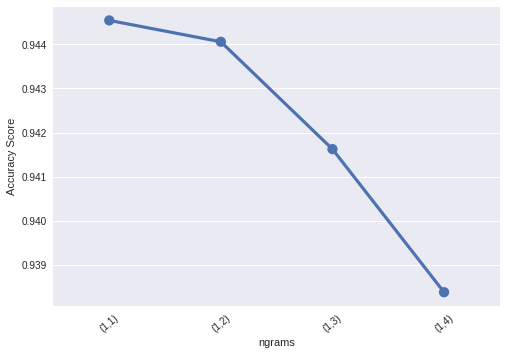

In [424]:
sns.pointplot(x=['(1,1)', '(1,2)', '(1,3)', '(1,4)'], y=ngram_scores)
plt.ylabel('Accuracy Score')
plt.xlabel('ngrams')
plt.xticks(rotation=40)
plt.show()

In [433]:

from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# #############################################################################


print("%d documents" % len(cands.Text))
print("%d categories" % len(cands.Handle.unique()))
print()

# #############################################################################
# Define a pipeline combining a text feature extractor with a simple
# classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    # 'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    # 'clf__max_iter': (10, 50, 80),
}

# multiprocessing requires the fork to happen in a __main__ protected
# block

# find the best parameters for both the feature extraction and the
# classifier
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(data.Text, data.Handle)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

8223 documents
2 categories

pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__max_iter': (20,),
 'clf__penalty': ('l2', 'elasticnet'),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.8s finished


done in 8.493s

Best score: 0.964
Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 20
	clf__penalty: 'l2'
	vect__max_df: 1.0
	vect__ngram_range: (1, 2)


In [434]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram


In [436]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(1,2))
X = vectorizer.fit_transform(X_train)
features = vectorizer.get_feature_names()
features

['000',
 '10',
 '100',
 '10am',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '21',
 '213',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '29',
 '30',
 '30pm',
 '31',
 '323',
 '3rd',
 '50',
 '6pm',
 '7pm',
 '800',
 'aapi',
 'able',
 'access',
 'account',
 'act',
 'action',
 'activists',
 'actually',
 'add',
 'address',
 'advocates',
 'affordable',
 'affordable housing',
 'age',
 'ago',
 'ahead',
 'aid',
 'air',
 'allow',
 'amazing',
 'america',
 'american',
 'americans',
 'angelenos',
 'angeles',
 'angeles city',
 'angeles county',
 'announced',
 'annual',
 'answer',
 'anti',
 'apahm',
 'applications',
 'apply',
 'apply http',
 'approach',
 'approved',
 'apr',
 'april',
 'area',
 'areas',
 'aren',
 'art',
 'article',
 'artist',
 'artists',
 'arts',
 'asian',
 'ask',
 'asking',
 'assistance',
 'association',
 'aug',
 'available',
 'ave',
 'avoid',
 'away',
 'ballot',
 'ban',
 'bank',
 'beautiful',
 'beds',
 'beg

In [437]:
kmeans = KMeans()
kmeans.fit(X)

KMeans()

In [447]:
# Find the top 10 features for each cluster.
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("Top features (words) for each cluster:")
for num, centroid in enumerate(top_centroids):
    print(f"{num}. {', '.join(features[i] for i in centroid)}")

Top features (words) for each cluster:
0. los, los angeles, angeles, city, la, com, city los, https, county, homeless
1. replying, thank, support, just, nithyavraman, think, like, work, years, love
2. city, la, council, city council, com, nithyaforthecity, city hall, nithyaforthecity com, hall, nithya
3. ow, ow ly, http ow, ly, http, join, lacd4, info, rsvp, art
4. la, people, com, http, need, housing, https, help, today, homeless
5. lacity org, lacity, org, davidryu, davidryu lacity, cd4 issues, issues lacity, cd4, issues, http davidryu
6. bit ly, bit, ly, http bit, http, https bit, https, join, la, register
7. thank, lacd4, community, join, happy, great, lacorps, park, hollywood, new


In [468]:
print("random sample of tweets in each cluster")
assigned_cluster = kmeans.transform(X).argmin(axis=1)

for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    sample_tweets = np.random.choice(cluster, 3, replace=False)
    
    print(f"cluster {i}:")
    for tweet in sample_tweets:
        print(f"{cands[['Handle']].iloc[tweet]}" + '\n' +  f"{cands[['Text']].iloc[tweet]}" + '\n')

random sample of tweets in each cluster
cluster 0:
Handle    @davideryu
Name: 241, dtype: object
Text    Yes - applies to homes and bars.
Name: 241, dtype: object

Handle    @nithyavraman
Name: 73, dtype: object
Text    LA’s small businesses are the backbone of our ...
Name: 73, dtype: object

Handle    @davideryu
Name: 350, dtype: object
Text    Today is Juneteenth, a holiday that commemorat...
Name: 350, dtype: object

cluster 1:
Handle    @davideryu
Name: 699, dtype: object
Text    Lacking documentation doesn’t make you any les...
Name: 699, dtype: object

Handle    @davideryu
Name: 197, dtype: object
Text    The artists relief program that I’ve fought fo...
Name: 197, dtype: object

Handle    @davideryu
Name: 55, dtype: object
Text    Today the \n@LACityCouncil\n established a COV...
Name: 55, dtype: object

cluster 2:
Handle    @nithyavraman
Name: 29, dtype: object
Text    In-person early voting began yesterday! We're ...
Name: 29, dtype: object

Handle    @davideryu
Name: 552, dt

In [478]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    topics = cands.iloc[cluster].dropna()
    most_common = Counter(topics.Handle).most_common()

    print(f"Cluster {i}:")
    for j in range (len(most_common)):
        print(f"     {most_common[j]}")

Cluster 0:
     ('@davideryu', 420)
     ('@nithyavraman', 64)
Cluster 1:
     ('@davideryu', 216)
     ('@nithyavraman', 28)
Cluster 2:
     ('@davideryu', 565)
     ('@nithyavraman', 80)
Cluster 3:
     ('@davideryu', 253)
     ('@nithyavraman', 36)
Cluster 4:
     ('@davideryu', 2321)
     ('@nithyavraman', 350)
Cluster 5:
     ('@davideryu', 316)
     ('@nithyavraman', 36)
Cluster 6:
     ('@davideryu', 373)
     ('@nithyavraman', 58)
Cluster 7:
     ('@davideryu', 912)
     ('@nithyavraman', 139)


In [480]:
string = []
for t in cands.Text:
    string.append(t)
string = pd.Series(string).str.cat(sep=' ')


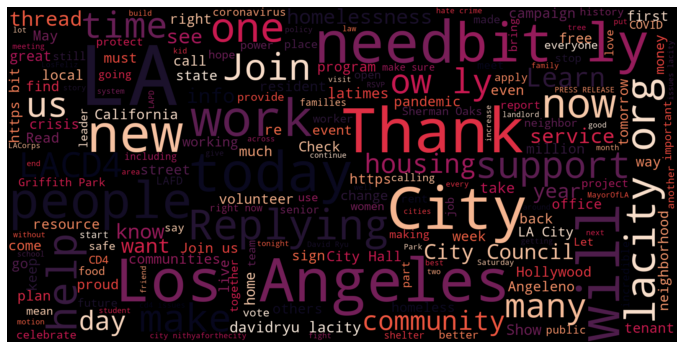

In [482]:

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='rocket').generate(string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [486]:
cvec = CountVectorizer()

cvec.fit(cands.Text)

nithya_doc_matrix = cvec.transform(cands[cands.Handle == '@nithyavraman'].Text)
david_doc_matrix = cvec.transform(cands[cands.Handle == '@davideryu'].Text)
nithya_tf = np.sum(nithya_doc_matrix,axis=0)
david_tf = np.sum(david_doc_matrix,axis=0)
nith = np.squeeze(np.asarray(nithya_tf))
dav = np.squeeze(np.asarray(david_tf))
term_freq_df = pd.DataFrame([nith,dav],columns=cvec.get_feature_names()).transpose()

In [490]:
term_freq_df['total'] = term_freq_df.sum(axis=1)

In [494]:
term_freq_df

,0,1,total
00,3,12,15.0
000,139,87,226.0
0001,0,2,2.0
0002,0,2,2.0
002,0,1,1.0
...,...,...,...
한인,0,3,3.0
합니다,0,2,2.0
해를,0,1,1.0
혹은,0,2,2.0


Text(0.5, 1.0, 'Top 300 tokens in tweets')

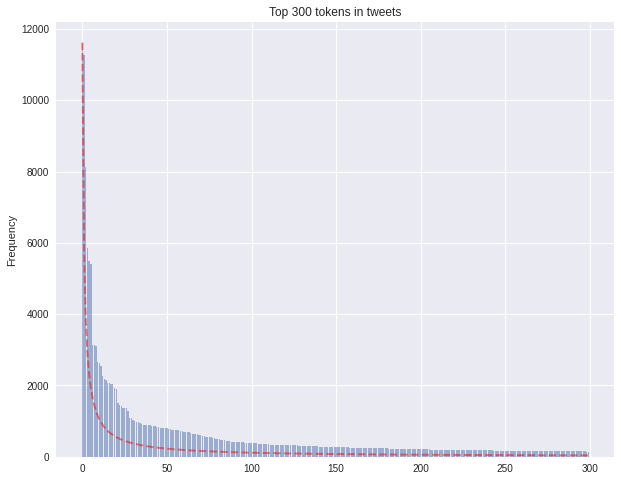

In [504]:
y_pos = np.arange(300)
plt.figure(figsize=(10,8))

expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1) for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:300], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 300 tokens in tweets')

In [506]:
term_freq_df.sort_values(by='total', ascending=False)['total'][:300]

the         11615.0
to          11258.0
and          8139.0
of           5849.0
in           5487.0
             ...   
trump         150.0
lives         149.0
forward       149.0
tonight       148.0
saturday      148.0
Name: total, Length: 300, dtype: float64

In [ ]:
'''

https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-3-zipfs-law-data-visualisation-fc9eadda71e7

'''